In [1]:
import sys
sys.path.append("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/code")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import package
import torch
import matplotlib

In [9]:
import importlib
importlib.reload(package.preprocessing)

<module 'package.preprocessing' from '/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/code/package/preprocessing.py'>

In [28]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")
n_runs = len(meta)
n_wins = 464
dfc_all = dfc.reshape((-1, n_wins, 82, 82))
cond = meta['condition'].to_numpy().reshape(156,464)
cond_sessions = cond[:,0]
dict_conditions = {"awake":0, "deep-propofol":1, "ketamine":2, "light-propofol":3, "light-sevoflurane":4, "deep-sevoflurane":5}
dict_conditions_inverse = {0:"awake", 1:"deep-propofol", 2:"ketamine", 3:"light-propofol", 4:"light-sevoflurane", 5:"deep-sevoflurane"}
colors = ["k","b","c","r","g","y"]
cond_num = np.array([dict_conditions[elem] for elem in cond_sessions])

In [34]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/dfc.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/DFCs/0.01-0.15-add_compor-False/meta.csv")
n_runs = len(meta)
n_wins = 461
dfc_train = dfc[meta["monkey"].isin(['almira', 'khali', 'kimiko', 'rana'])].reshape((-1, n_wins, 82, 82))
dfc_test = dfc[(meta["monkey"] == "jade")].reshape((-1, n_wins, 82, 82))
dfc_all = dfc.reshape((-1, n_wins, 82, 82))

In [35]:
id_sessions_awake = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["awake"]])
id_sessions_light_propofol = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["light-propofol"]])
id_sessions_deep_propofol = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["deep-propofol"]])
id_sessions_ketamine = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["ketamine"]])
id_sessions_light_sevoflurane = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["sevoflurane2"]])
id_sessions_deep_sevoflurane = np.array([i for i in range(len(meta)) if meta["condition"].iloc[i] in ["sevoflurane4"]])

In [41]:
idx = np.concatenate([id_sessions_awake,id_sessions_light_sevoflurane,id_sessions_deep_sevoflurane])

In [42]:
X = dfc_all[idx,:,:,:].reshape(-1,82,82)
session = torch.from_numpy(X).flatten(1)
corr = torch.corrcoef(session)

In [44]:
len(id_sessions_deep_sevoflurane)

20

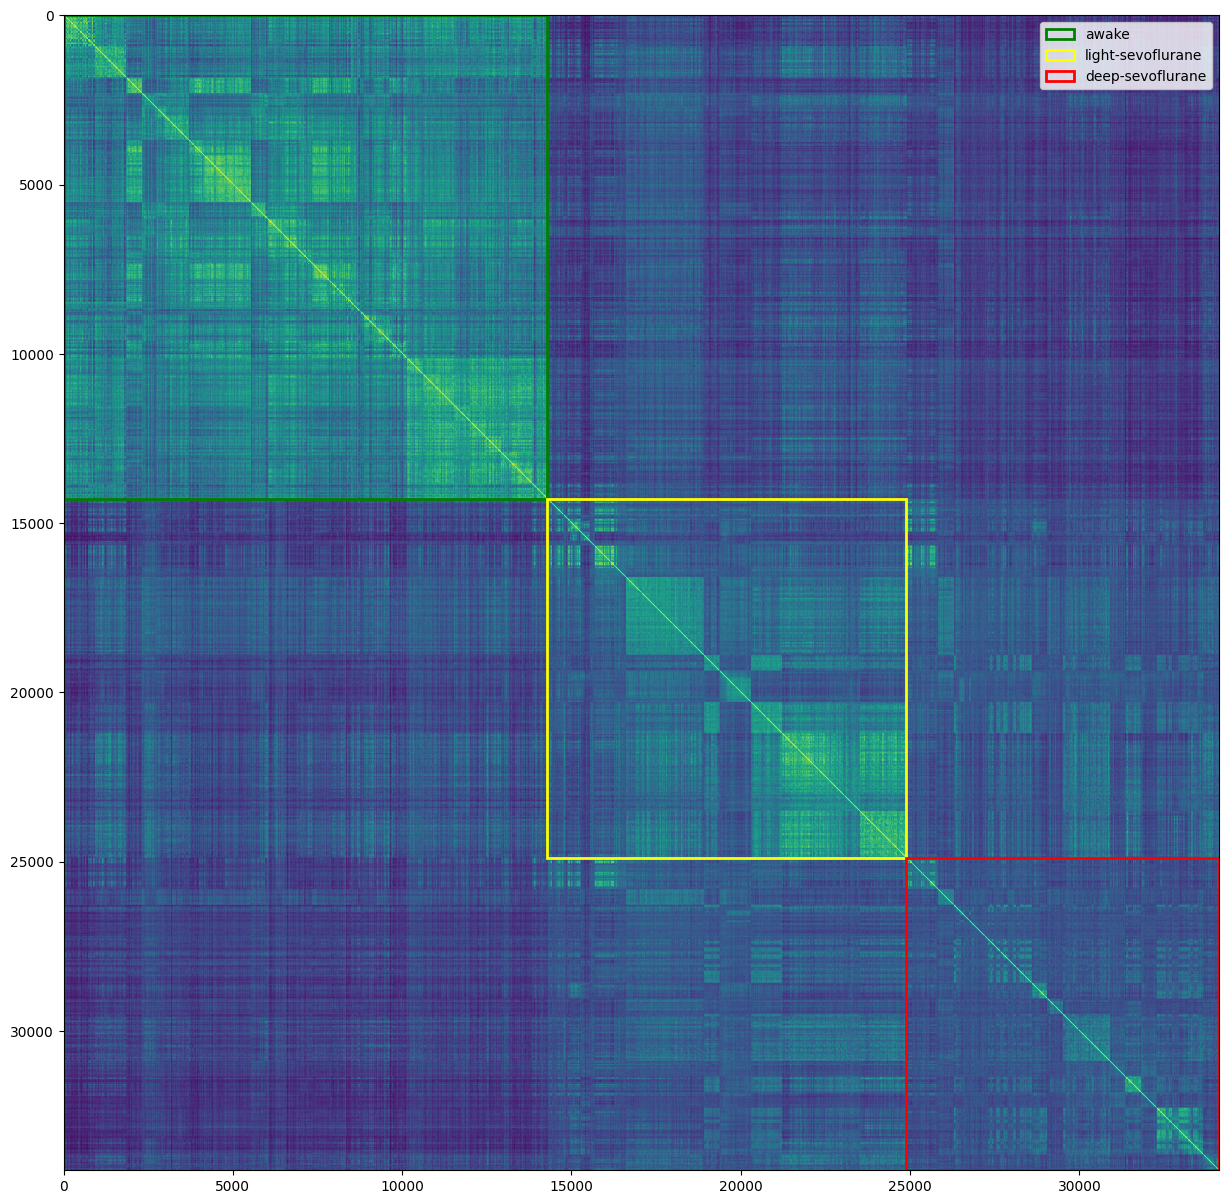

In [45]:
plt.figure(figsize = (15,15))
plt.imshow(corr)
plt.gca().add_patch(matplotlib.patches.Rectangle((0,0),31*461,31*461,
                    edgecolor='green',
                    facecolor='none',
                    lw=2,
                    label = "awake"))
plt.gca().add_patch(matplotlib.patches.Rectangle((31*461+1,31*461+1),23*461,23*461,
                    edgecolor='yellow',
                    facecolor='none',
                    lw=2,
                    label = "light-sevoflurane"))
plt.gca().add_patch(matplotlib.patches.Rectangle((54*461+1,54*461+1),20*461,20*461,
                    edgecolor='red',
                    facecolor='none',
                    lw=2,
                    label = "deep-sevoflurane"))
plt.legend()
plt.show()

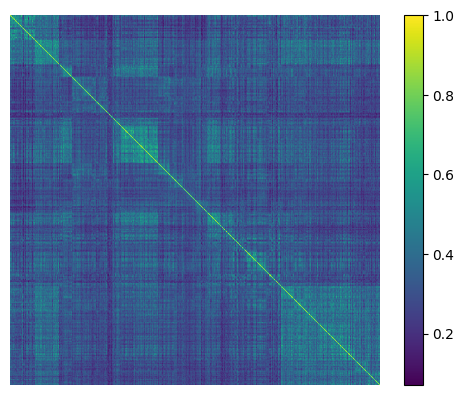

In [83]:
X = dfc_all[:30,:,:,:].reshape(-1,82,82)
session = torch.from_numpy(X).flatten(1)
corr = torch.corrcoef(session)
plt.imshow(corr,vmin = corr.min(),vmax = corr.max())
plt.colorbar()
plt.axis('off')
plt.show()

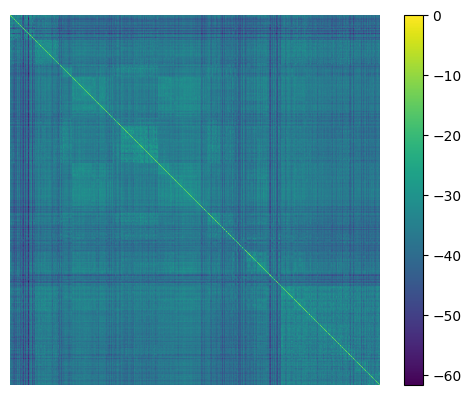

In [84]:
session = torch.from_numpy(dfc_all[:30,:,:,:]).flatten(2).reshape(-1,82*82)
euclidean_dist = -torch.cdist(session,session)
plt.imshow(euclidean_dist,vmin = euclidean_dist.min(),vmax = euclidean_dist.max())
plt.colorbar()
plt.axis('off')
plt.show()

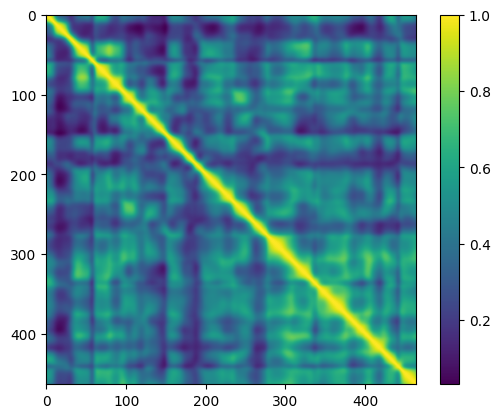

In [102]:
session = torch.from_numpy(dfc_all[15,:,:,:]).flatten(1)
corr = torch.corrcoef(session)
plt.imshow(corr,vmin = corr.min(),vmax = corr.max())
plt.colorbar()
plt.show()

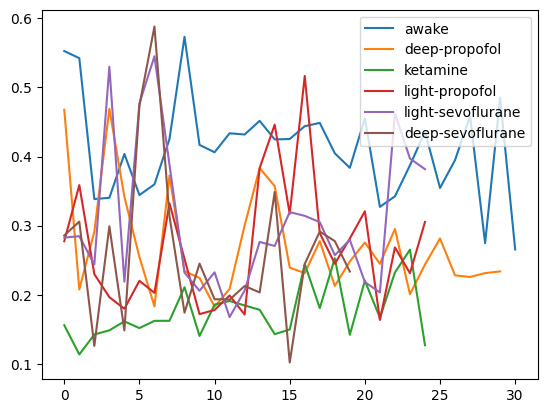

In [159]:
l = []
for i in range(dfc_all.shape[0]):
    session = torch.from_numpy(dfc_all[i,:,:,:]).flatten(1)
    corr = torch.corrcoef(session)
    l.append(corr.mean())
l = np.array(l)

for i in range(6):
    plt.plot(l[cond_num == i],label=dict_conditions_inverse[i])
plt.legend()
plt.show()

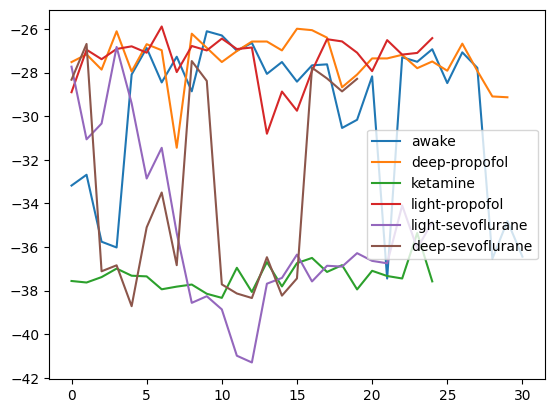

In [97]:
l = []
for i in range(dfc_all.shape[0]):
    session = torch.from_numpy(dfc_all[i,:,:,:]).flatten(1)
    euclidean_dist = -torch.cdist(session,session)
    l.append(euclidean_dist.mean())
l = np.array(l)

for i in range(6):
    plt.plot(l[cond_num == i],label=dict_conditions_inverse[i])
plt.legend()
plt.show()